# **SpaceX Falcon9 launch prediction project** 
### **<span style="color:#ff9933">Part 3: Data Visualization</span>** 
**Mason Phung**   
Last edited: December 2024

*Space Exploration Technologies Corp. or SpaceX is an American spacecraft manufacturer, popular for their successful mission in sending a spacecraft and astronauts to the International Space Station. They are also well-known for their [VTVL](https://en.wikipedia.org/wiki/VTVL) rocket launches , in which rockets can land and be resued, thus save a huge amount of launching cost for the company.*

*One of SpaceX's most popular rocket - the Falcon 9, have landed and reflown [more than 200 times](https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches) . The rocket was advertised on its website with a launch cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch.*

*We are working at a business in the aerospace industry who are developing a space rocket and are researching different rocket technologies and their competitiors.*

*In this project, we will collect & analyze past launches data of the Falcon 9 rockets then try to predict the outcome of future launches using different Machine Learning models. The main purpose is to find which factor contributes to the success of each flight and to build a Machine Learning model that can predict the outcome of a rocket launch.*

**Questions**
1. What are the important features that contributes to the success of each launch?
2. Does geography play an essential role in the success of each launch?
3. What can be suggested to improve to increase the successful rate?
4. What can be suggested to improve the reliability of the predicting model?

# **<span style="color:#ff9933">Process description</span>**

**Part 1: Data collection by requesting API and web scrapping**
- Request data from SpaceX API using `requests` and webscrape from wikipedia using `BeautifulSoup`
- Clean & format data after collecting

**Part 2: Descriptive analysis using:**
- Make Python & SQL queries to explore the datasets
- Setting up a local SQL database(server)

<span style="color:#ff9933">

**Part 3: Visualization:**
- Plotting with `matplotlib` and `seaborn`   
- Geographical visualization with `folium`   
- Build an Interactive dashboard with `dash` and `plotly.express` (in a separate dash app)

</span>

**Part 4: Machine Learning with `sklearn` (Classification):**
- Apply different techniques to enhance models' accuracy & correctness including:
    - Select features based on correlation strength + multicollinearity
    - Features engineering: convert categorical non-numerical data into numerical format
    - Train/test split with stratification to ensure data balance
    - Normalize data to ensure the variables have a standard scale
- Models: Logistic Regression, Support Vector Machine, Decision Trees, K nearest neighbors, XGBoost, Neural Networks
- After applying default models, conduct hyperparamter tuning with `GridSearchCV` to improve the models' performances

**Part 5: Discussion**
- Notable observations gained when anaylyze data
- The performance of the Machine Learning (ML) models
- The cons of the project and the dataset
- Improvements & suggestion

----


# **<span style="color:#ff9933">Libraries</span>**


In [ ]:
# Basics & cores for our work + data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon


# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Print all of the data in a feature
pd.set_option('display.max_colwidth', None)


In [ ]:
# utils
import sys
from pathlib import Path

# Add the src directory to the system path
src_path = Path("../src").resolve()
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))
    
from src import mysql_init, utils
import src.utils


In [ ]:
# Import data
falcon9_general=pd.read_csv("dataset/Falcon9_general.csv")
falcon9_technical=pd.read_csv("dataset/Falcon9_technical.csv")

# <span style="color:#ff9933">**Part 3. Data visualization**</span>

- We will use `matplotlib` and `seaborn` to plot & analyze the relationship between different variables in the `falcon9_technical` dataset.
- Then use folium to plot the geographic position of each launch sites as well as adding each site's information into the interactive map.

## **A. Data visualization with `matplotlib` and `seaborn`**

We mainly use plot to observe the relationships between different variables in the dataset

### <span style="color:#ff9933">I. The relationship between Flight number and Payload</span>

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


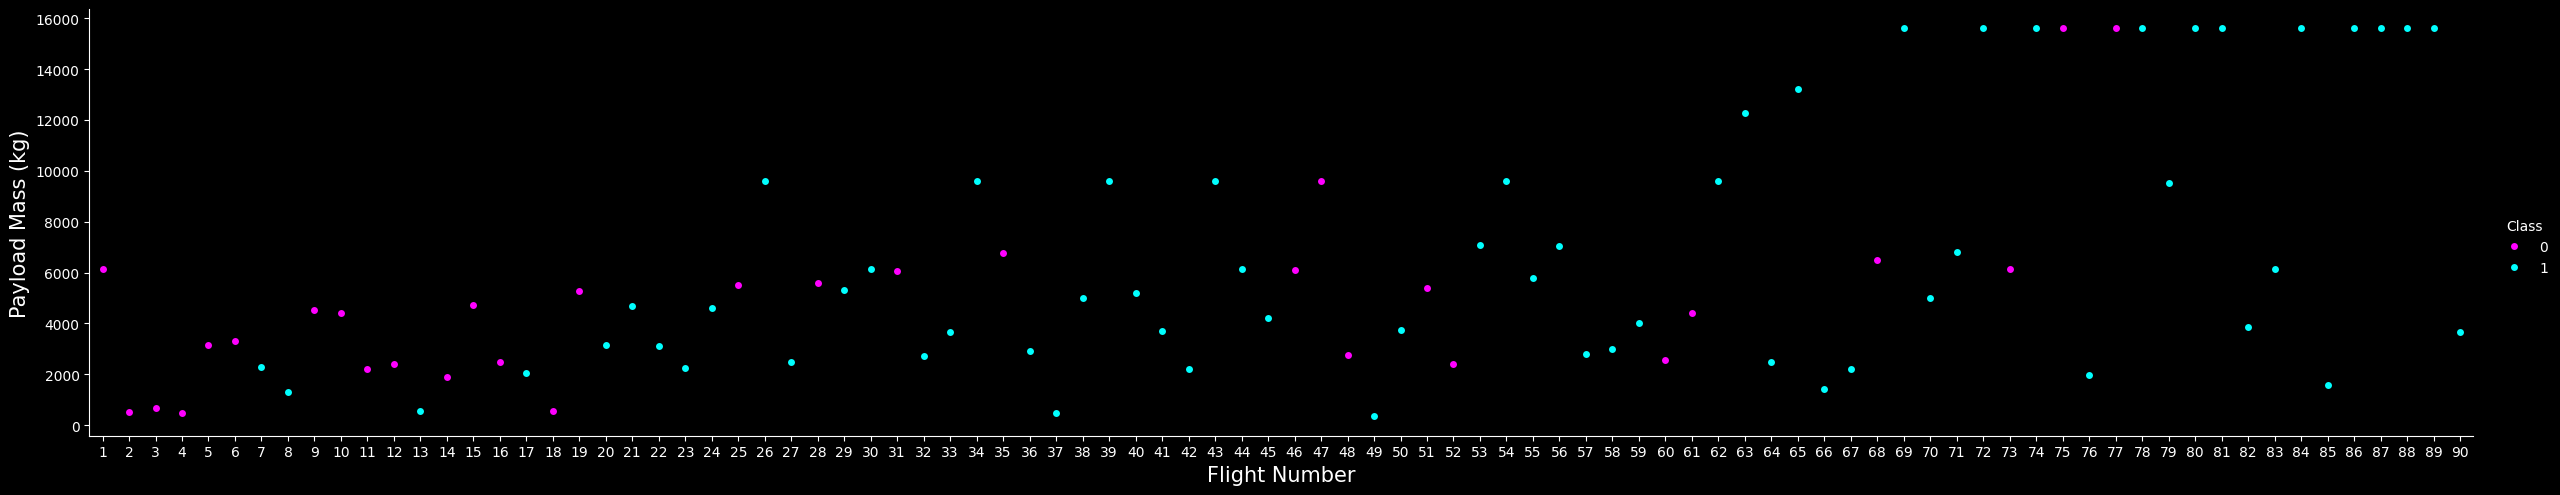

In [58]:
# Some basic aesthetics preparation for plots
plt.style.use("dark_background") # Because I use dark theme for VSC
colors = {0: 'magenta', 1:'cyan'}

sns.catplot(
    data = falcon9_technical, 
    x = "FlightNumber", 
    y = "PayloadMass",
    hue = "Class",
    palette = colors,
    aspect = 5
)
plt.xlabel(
    "Flight Number",
    fontsize=15
)
plt.ylabel(
    "Payload Mass (kg)",
    fontsize=15
)
plt.show()

- *The bigger the number of the flight, the later the flight is. We can notice that later flights are likely to be more success and there were more attempts to launch with higher payload mass.*
- *From flight 78, the success rate is 100%, latest 12 launches were all successful*

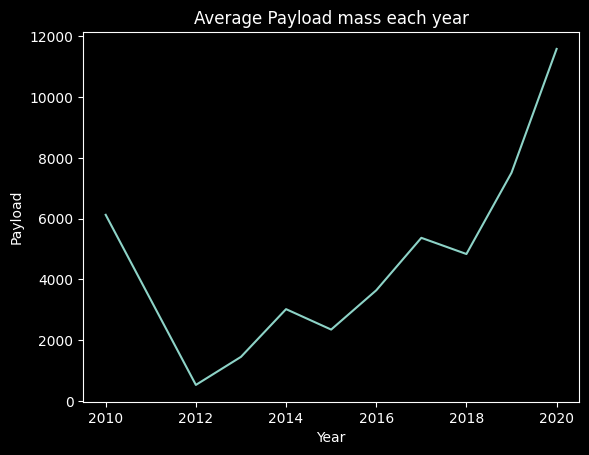

In [59]:
# Assuming falcon9_technical is your DataFrame and 'Date' is a column of datetime.date objects
def extract_year(date_series):
    return date_series.apply(lambda x: x.year)  # Use the .year attribute for datetime.date objects

# Now, create a new column in falcon9_technical directly
falcon9_technical['Year'] = extract_year(falcon9_technical['Date'])

# Calculate average success rate per year
df_yearly = falcon9_technical.groupby('Year')['PayloadMass'].mean().reset_index()

# Plot
sns.lineplot(
    data = df_yearly,
    x = 'Year',
    y = 'PayloadMass'
)
plt.title('Average Payload mass each year')
plt.ylabel('Payload')
plt.xlabel('Year')
plt.show()

- *Note that there is only 1 launch in 2010.*
- *There is a trend of increase in average carried payload mass each year.*

### <span style="color:#ff9933">II. The relationship between Flight number and Launch site</span>

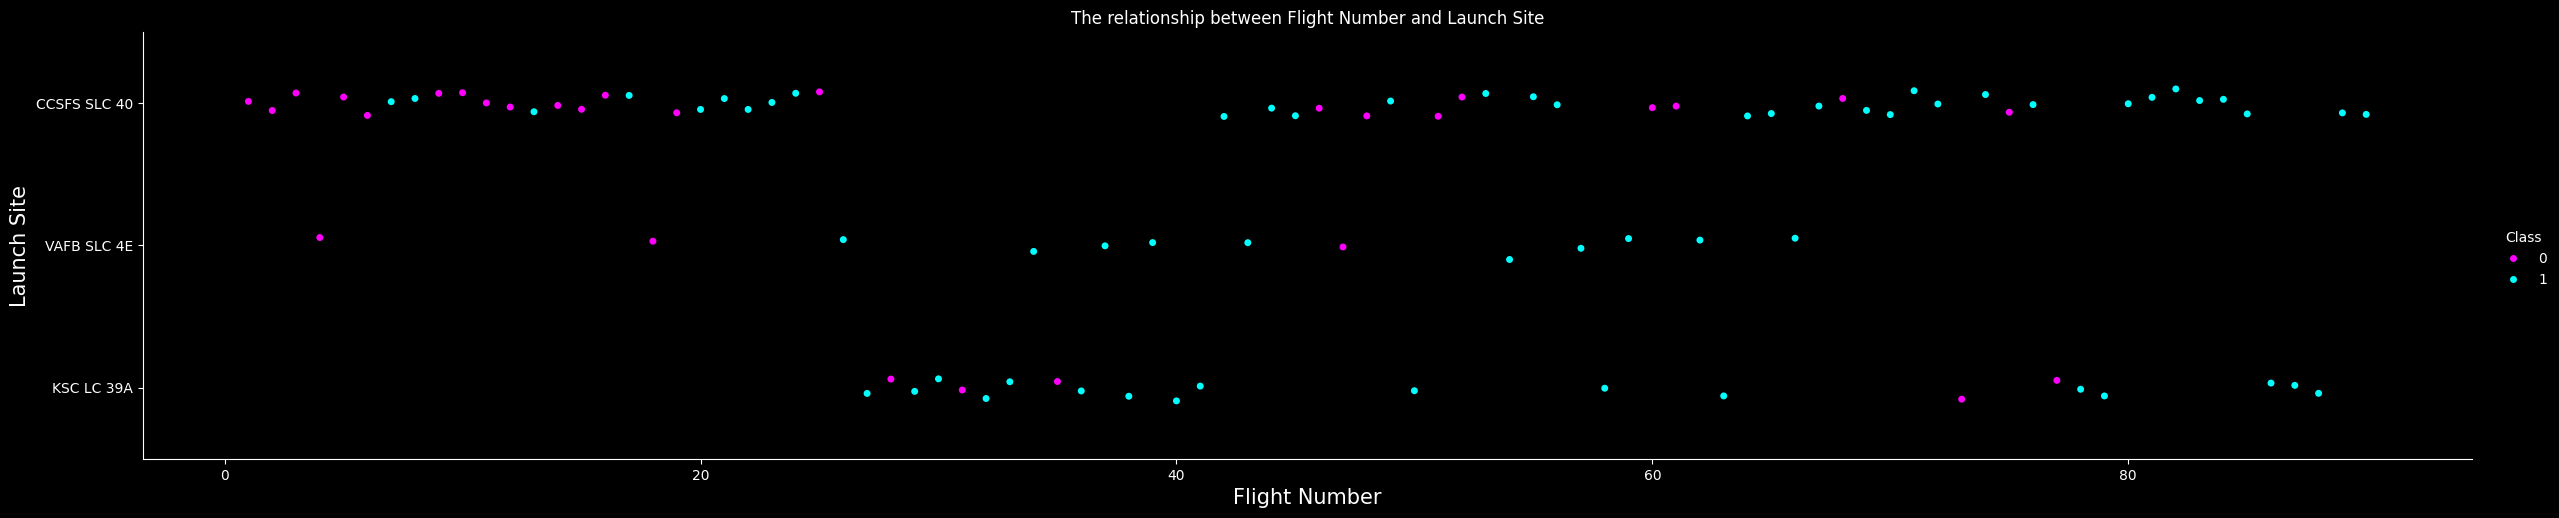

In [60]:
sns.catplot(
    data = falcon9_technical,
    x = "FlightNumber",
    y = "LaunchSite",
    hue = 'Class',
    palette = colors,
    aspect = 5
),
plt.title("The relationship between Flight Number and Launch Site"),
plt.xlabel(
    "Flight Number",
    fontsize = 15
),
plt.ylabel(
    "Launch Site",
    fontsize = 15
),
plt.show()

- *It's visible that `VAFB` was the least used site*
- *CCAFS is the site with the most launches and also with the most failed launches*

### <span style="color:#ff9933">III. The relationship between Payload and Launch site</span>

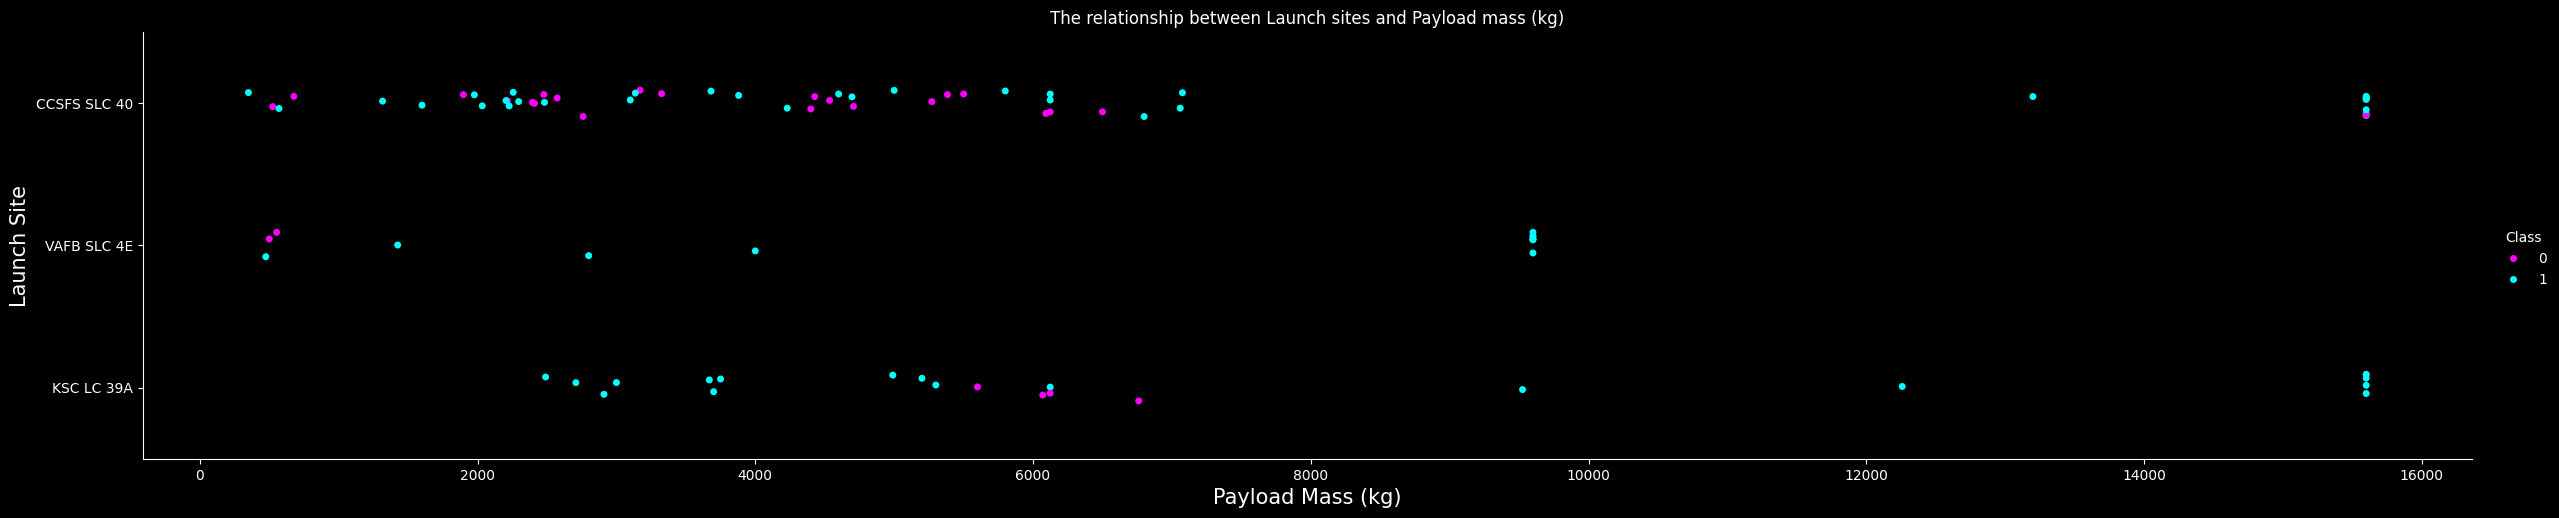

In [61]:
sns.catplot(
    data = falcon9_technical,
    x = "PayloadMass",
    y = "LaunchSite",
    hue = "Class",
    palette = colors,
    aspect = 5
),
plt.title("The relationship between Launch sites and Payload mass (kg)"),
plt.xlabel(
    "Payload Mass (kg)",
    fontsize = 15
),
plt.ylabel(
    "Launch Site",
    fontsize = 15
),
plt.show()

- *For the VAFB-SLC launchsite there are no rockets launched for heavy payload(mass greater than 10000 kg)*.
- *KSC LC has a 100% success rate at Payload mass lower than 5500*.
- *Success rate for all 3 launch sites from >8000kg payload mass is extremelu high*.

### <span style="color:#ff9933">IV. The success rate of each orbit type</span>

In [62]:
# Calculate success rate average and count of total launches per orbit
orbit_success_rate = falcon9_technical.groupby('Orbit')['Class'].agg(['mean', 'count']).reset_index()
orbit_success_rate.columns = ['Orbit', 'Average Success Rate', 'Total Launches']
orbit_success_rate['Average Success Rate'] *= 100

# Add a final row with the total of all launches and the average of the average success rates
total_launches = orbit_success_rate['Total Launches'].sum()
average_of_averages = orbit_success_rate['Average Success Rate'].mean()

# Create a new row for the totals and averages, then append it to the DataFrame
summary_row = pd.DataFrame({
    'Orbit': ['All Orbits'],
    'Average Success Rate': [average_of_averages],
    'Total Launches': [total_launches]
})

orbit_success_rate = pd.concat([orbit_success_rate, summary_row], ignore_index=True)

# Filter the order of the data by success rate descendingly and ensure the last row stays at the bottom
orbit_success_rate = orbit_success_rate.sort_values(
    by='Average Success Rate',
    ascending=False,
    ignore_index=True
)

# Place the summary row at the end of the DataFrame
orbit_success_rate = pd.concat([orbit_success_rate.iloc[:-1], orbit_success_rate.iloc[-1:]])

orbit_success_rate


,Orbit,Average Success Rate,Total Launches
0,ES-L1,100.000000,1
1,GEO,100.000000,1
2,HEO,100.000000,1
3,SSO,100.000000,5
4,VLEO,85.714286,14
5,All Orbits,73.112073,90
6,LEO,71.428571,7
7,MEO,66.666667,3
8,PO,66.666667,9
9,ISS,61.904762,21


In [63]:
ax = px.bar(
    orbit_success_rate,
    x = "Average Success Rate",
    y = "Orbit",
    color = "Average Success Rate",
    text = 'Average Success Rate',
    title = 'Success rate of each orbit',
    template = 'plotly_dark',
)

ax.update_layout(
    xaxis_title = "Success rate (%)",
    yaxis_title = 'Orbit'
)

ax.update_traces(
    texttemplate='%{text:.1f}', 
    textposition='outside'
)

ax.show()

- *Orbit ES-L1, GEO, HEO, SSO has 100% success rate. However note that 3/4 of them only have 1 launch.*
- *Orbit VLEO has more than 80% of success rate.*
- *Orbit GTO and ISS have the most launch count*

### <span style="color:#ff9933">V. The relationship between Flight number and Orbit type</span>

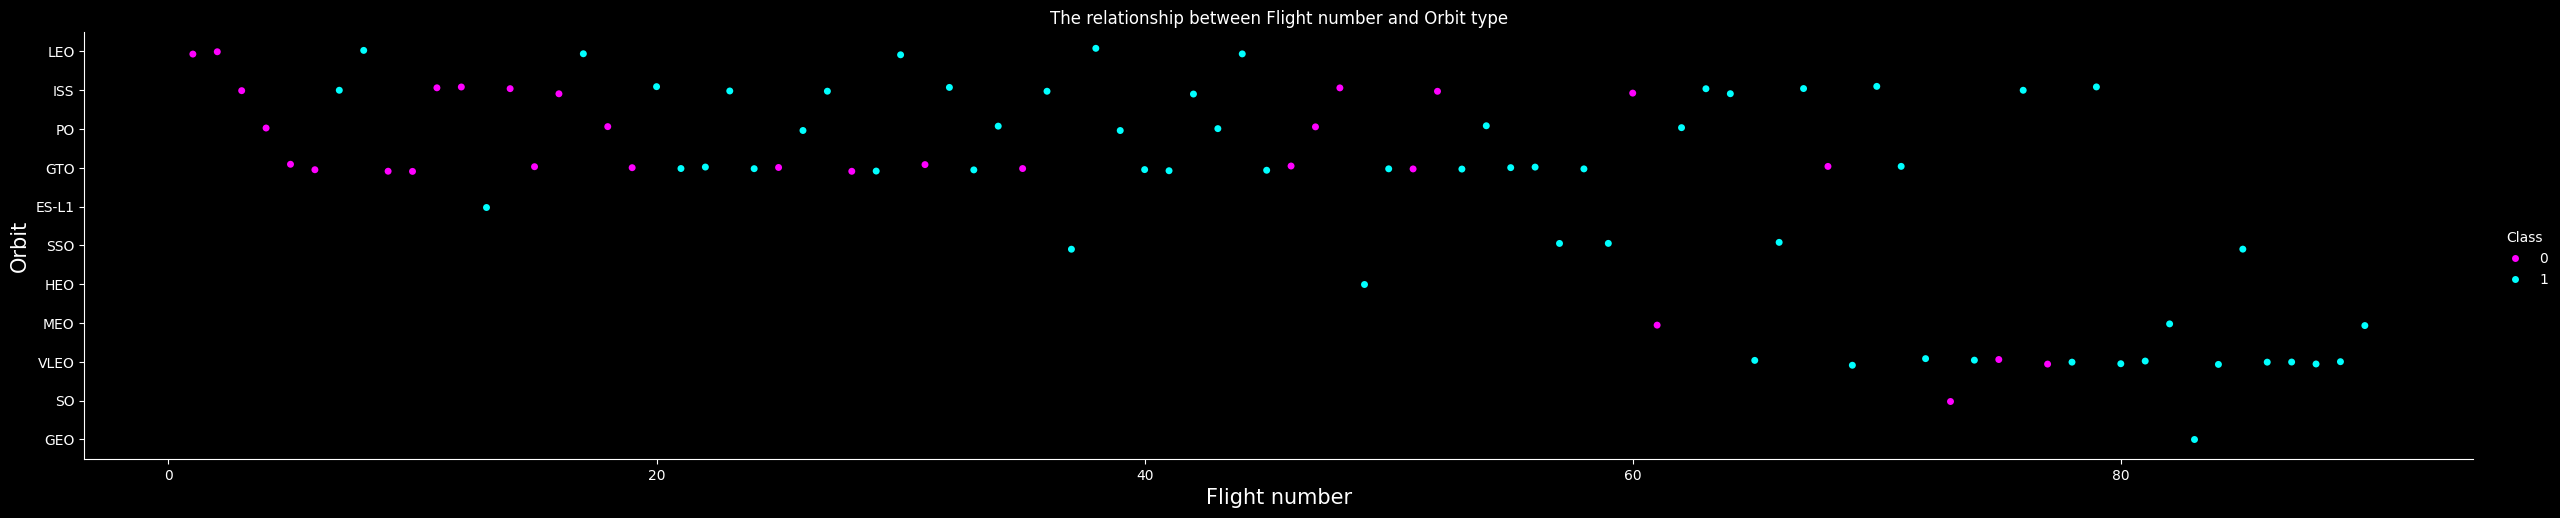

In [64]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(
    data = falcon9_technical,
    x = 'FlightNumber',
    y = 'Orbit',
    hue = 'Class',
    palette = colors,
    aspect = 5
),
plt.title('The relationship between Flight number and Orbit type'),
plt.xlabel(
    'Flight number',
    fontsize = 15
),
plt.ylabel(
    'Orbit',
    fontsize = 15),
plt.show()

- *In the LEO orbit the Success appears related to the number of flights.*
- *It seems that there is no relationship between flight number when in GTO, PO, ISS orbit.*

### <span style="color:#ff9933">VI. The relationship between Payload and Orbit type</span>

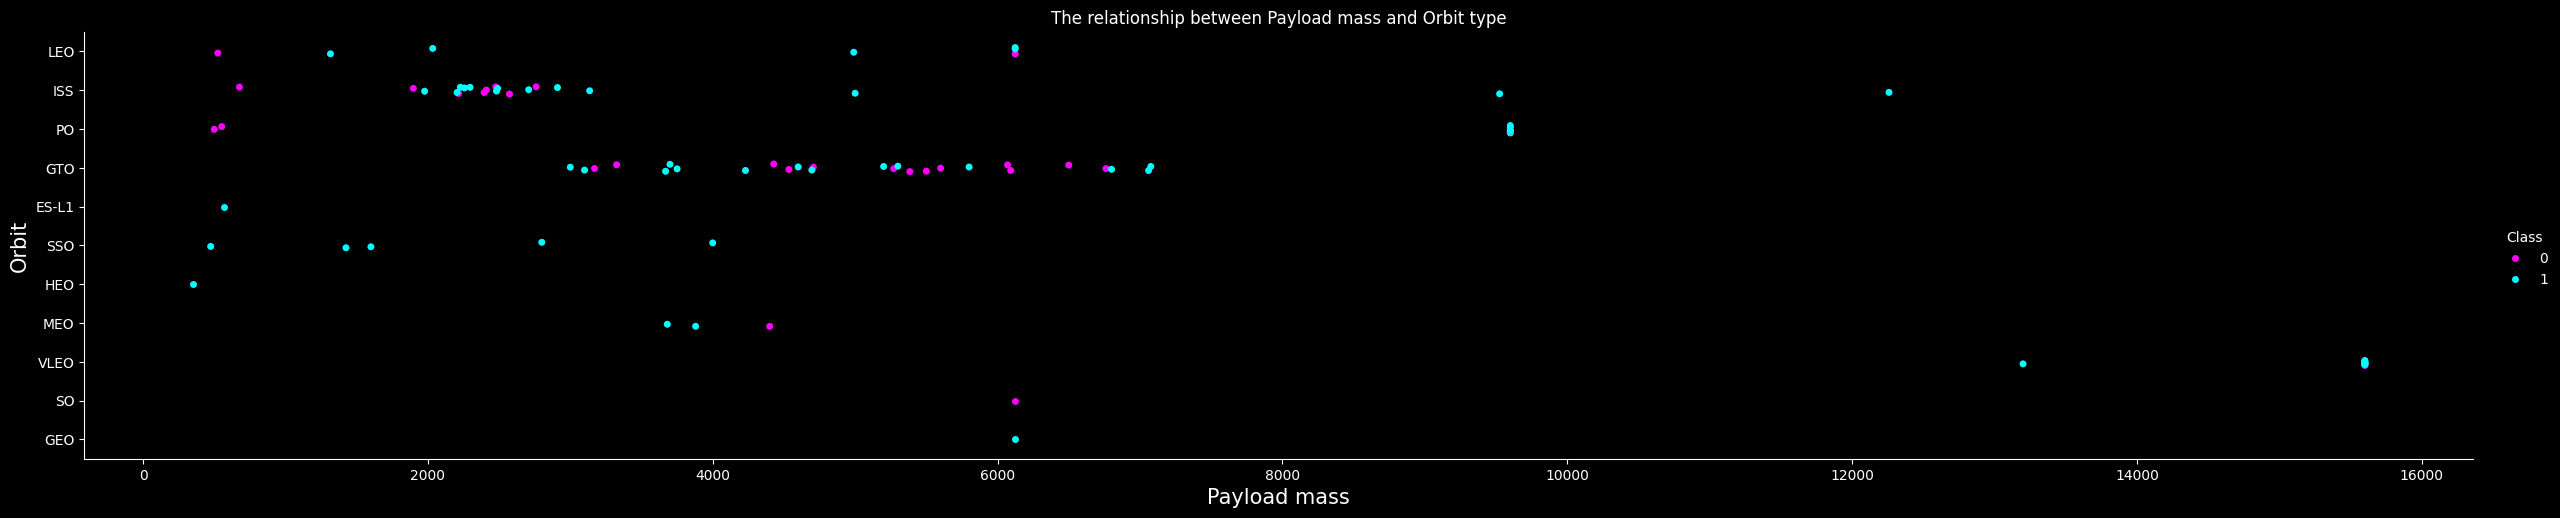

In [65]:
sns.catplot(
    data = falcon9_technical,
    x = 'PayloadMass',
    y = 'Orbit',
    hue = 'Class',
    palette = colors,
    aspect = 5
),
plt.title('The relationship between Payload mass and Orbit type'),
plt.xlabel(
    'Payload mass',
    fontsize = 15
),
plt.ylabel(
    'Orbit',
    fontsize = 15),
plt.show()

- *With heavy payloads the successful landing or positive landing rate are more for LEO and ISS.*
- *For the rest, either they only have '1' class, or the relationship cannot be distinguished.*

### <span style="color:#ff9933">VII. Success rate by number of launches</span>

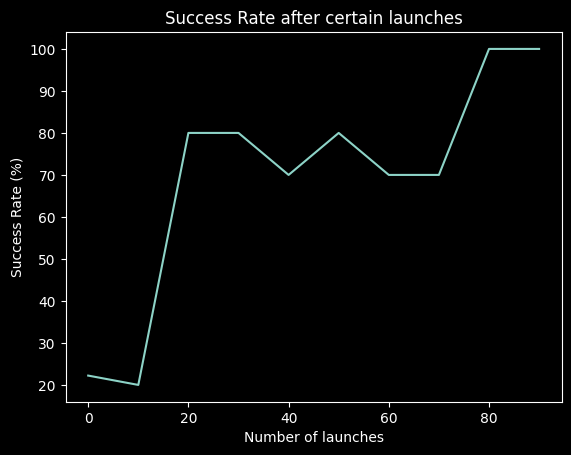

In [66]:
# Sort the dataset by flight number to ensure the launches are in order
falcon9_technical.sort_values(by='FlightNumber', inplace=True)

# Group every 10 launches
falcon9_technical['LaunchGroup'] = (falcon9_technical['FlightNumber'] // 10) * 10

# Group the dataset by 'LaunchGroup' and calculate the success rate for each group
success_rate = falcon9_technical.groupby('LaunchGroup')['Class'].mean().reset_index(name='SuccessRate')

# Convert success rate into %
success_rate['SuccessRate'] *= 100

sns.lineplot(
    data=success_rate,
    x='LaunchGroup',
    y='SuccessRate'
)
plt.title('Success Rate after certain launches')
plt.ylabel('Success Rate (%)')
plt.xlabel('Number of launches')
plt.show()


- *It is visible that success rate increased in the whole period.*
- *From flight 10th to 20th, the success rate rapidly increased.*
- *Reached 100% success rate after 80 flights*

### <span style="color:#ff9933">VIII. Success rate by year</span>

Success rate by year</span>

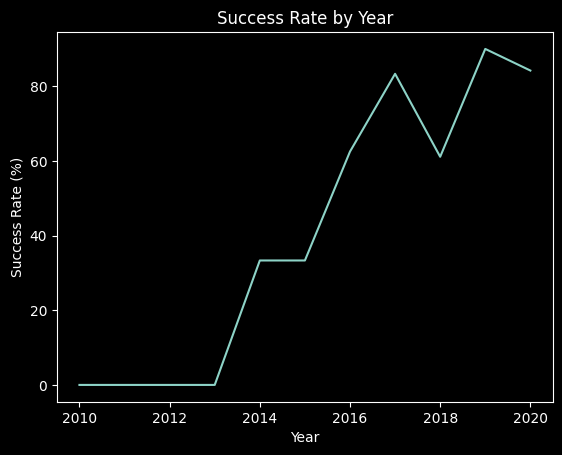

In [67]:
# Assuming falcon9_technical is your DataFrame and 'Date' is a column of datetime.date objects
def extract_year(date_series):
    return date_series.apply(lambda x: x.year)  # Use the .year attribute for datetime.date objects

# Now, create a new column in falcon9_technical directly
falcon9_technical['Year'] = extract_year(falcon9_technical['Date'])

# Calculate average success rate per year
df_yearly = falcon9_technical.groupby('Year')['Class'].mean().reset_index()

# Convert success rate into %
df_yearly['Class'] *= 100

# Plot
sns.lineplot(
    data=df_yearly,
    x='Year',
    y='Class'
)
plt.title('Success Rate by Year')
plt.ylabel('Success Rate (%)')
plt.xlabel('Year')
plt.show()

- *It is visible that success rate increased in the whole period.*
- *Year 2019 has the highest success rate.*

### <span style="color:#ff9933">IX. Launch outcome by year</span>

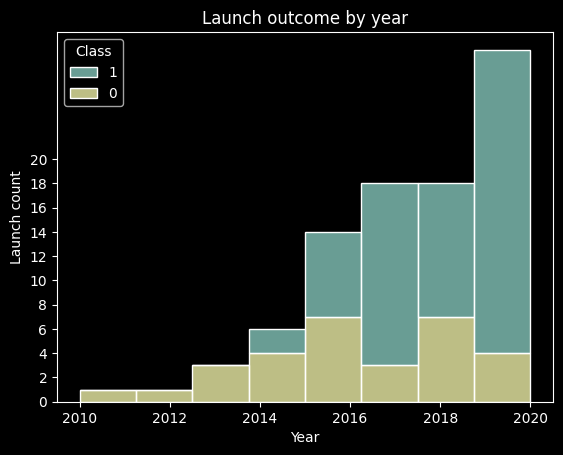

In [68]:
sns.histplot(
    data = falcon9_technical,
    x = "Year",
    hue = "Class",
    hue_order = [1,0],
    multiple = "stack"
),
plt.title("Launch outcome by year"),
plt.xlabel("Year"),
plt.ylabel("Launch count"),
plt.yticks(
    np.arange(
        0, 22,
        step = 2
    )
),
plt.show()

*Success rate is rising with successful class dominates in the last 5 years from 2016-2020.*

### <span style="color:#ff9933">X. Launch site used by year</span>

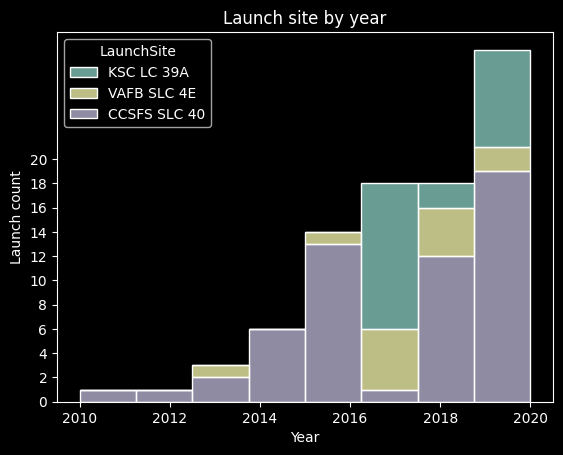

In [69]:
sns.histplot(
    data = falcon9_technical,
    x = "Year",
    hue = "LaunchSite",
    hue_order = ["KSC LC 39A", "VAFB SLC 4E",  "CCSFS SLC 40"],
    multiple = "stack"
),
plt.title("Launch site by year"),
plt.xlabel("Year"),
plt.ylabel("Launch count"),
plt.yticks(
    np.arange(
        0, 22,
        step = 2
    )
),
plt.show()

*CCSFS SLC 40 has the most launches thoroughout the years.*

## **B. Geographical visualization with `folium`**

**Prepare data for visualization**

- `falcon9_technical` data will be used in this section.   
- Because we are plotting geographic data, we will filter the data to consider 
only `launch site`, `latitude` and `longitude` as well as `class` to observe the relationship between 
success/failed launches and launch geographic location

In [70]:
# Select relevant columns and create a new df
falcon9_geo = falcon9_technical[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
falcon9_geo.head()

,LaunchSite,Latitude,Longitude,Class
4,CCSFS SLC 40,28.561857,-80.577366,0
5,CCSFS SLC 40,28.561857,-80.577366,0
6,CCSFS SLC 40,28.561857,-80.577366,0
7,VAFB SLC 4E,34.632093,-120.610829,0
8,CCSFS SLC 40,28.561857,-80.577366,0


In [71]:
# Since each launch site only have 1 latitude and longitude
# Group them by `LaunchSite` to see the sites we have
launch_sites = falcon9_geo.groupby(['LaunchSite'], as_index = False).first()
launch_sites = launch_sites.drop('Class', axis = 1)

# Add NASA Johnson Space Center coordinate to `launch_sites` df
nasa_coordinate = [29.559684888503615, -95.0830971930759]
new_row = pd.DataFrame({
    'LaunchSite': 'NASA JSC', 
    'Latitude': nasa_coordinate[0], 
    'Longitude': nasa_coordinate[1]
}, index = [0])
launch_sites = pd.concat([launch_sites, new_row])
launch_sites

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829
0,NASA JSC,29.559685,-95.083097


**Create a folium `map` object:**
- Highlight each area with a circle and label the name of the site.   
- The center location to be NASA Johnson Space Center (at Houston, Texas), colored purple.
- The launch sites will be colored green



In [72]:
# Create a Folium map object
site_map = folium.Map(location=nasa_coordinate, zoom_start=4.4)

# Create a function to draw circle and marker of each launch site
def draw_site_position(df, folium_map):
    """
    Visualize launch site position on a folium map by adding an area circle and a name marker
    
    Parameter:
    - df (DataFrame): The data which consists of launch site name, its latitude and longitude position.
    - folium_map (Folium map object): Created Folium map to be used to store and visualize launch site position.
    
    Return:
    folium_map (Folium map object)
        A folium map include the circles represent launch sites and text markers as site name label.
    
    """
    for site in df['LaunchSite']:
        df1 = df[df['LaunchSite'] == site]
        latitude, longitude = df1['Latitude'], df1['Longitude']
        
        # Set color based on the site name
        if site == 'NASA JSC':
            theme_color = 'red',
            html_setting = '<div style="font-size: 12; color:red;"><b>%s</b></div>' % f'{site}'
        else:
            theme_color = 'blue',
            html_setting = '<div style="font-size: 12; color:blue;"><b>%s</b></div>' % f'{site}'
        
        # Create a circle represents launch site
        circle = folium.Circle(
            location = [latitude, longitude], 
            radius = 1000, 
            color = 'black',
            fill_color = theme_color, 
            fill = True,
            tooltip = f'{site}'
        ).add_child(folium.Popup(f'{site}'))

        # Create marker as label for launch site name
        marker = folium.Marker(
            location = [latitude, longitude],
            tooltip = f'{site}',
            # Create an icon as a text label
            icon = DivIcon(
                icon_size = (20, 20),
                icon_anchor = (0, 0),
                html = html_setting,
            )
        )
        folium_map.add_child(circle)
        folium_map.add_child(marker)
    return folium_map
        
# Generate folium plot
draw_site_position(launch_sites, site_map)

**Add `marker` object to show the total number of launches and successful/failed launches in each site:**
- Create a Marker object by the coordinates in each row
- Customize the Marker icon to indicate if the launch was successful or failed
- Add the newly created `marker` object to existing `site_map`

In [73]:
# Create a marker cluster object
marker_cluster = MarkerCluster()
# Add marker_cluster to current Folium map object
site_map.add_child(marker_cluster)

for index, row in falcon9_geo.iterrows():
    if row['Class'] == 1:
        marker_color = 'green'
    else:
        marker_color = 'red'
    marker = folium.Marker(
        location = [row['Latitude'], row['Longitude']],
        icon = folium.Icon(
            color = 'white',
            icon_color = marker_color
        )
    )
    marker_cluster.add_child(marker)

site_map

- *We can see the geographical position of each launch site, as well as the NASA Johnson Space Center.*
- *While the VAFB site is located on the West coast (near Los Angeles), the other 2 sites are located in the East coast (Florida).*
- *Most of the rockets were launched on the East coast (77 out of 90) and between the 2 sites in the East, CCSFC hosted more launches (55/77)*